In [15]:
import ROOT as R
import decode as decode
import os
import math
c=R.TCanvas()

%jsroot on

Subrun 2 TP pattern 15 <br>
Subrun 3 TP pattern 1

In [2]:
def get_last_file_num(mypath, number):
    acq_to_return=""
    onlyfiles = [f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath, f)) and 'ACQ_log' in f)]
    for F in onlyfiles:
        if "{}".format(number) in F:
            acq_to_return=F
    onlyfiles = [f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath, f)) and '.dat' in f)]
    for F in onlyfiles:
        if "{}".format(number) in F:
            data_to_return=F
    return (acq_to_return,data_to_return)

In [3]:
def extract_num_triggers(filename):
    with open (filename,'r') as log_file:
        for line in log_file.readlines():
            if "total packets" in line:
                return line.split(" ")[-1]

In [4]:
GEM5 = decode.reader(0, 1, 0, 0)


In [5]:
def analize_subrun_1_cannel(subrun_number, GEM5):
    the_path="/media/alb/space/TIGER_scriptsV3/data_folder/RUN_90017/"
#     the_path="/media/alb/Removibile/dati_raw/RUN_90014/"

    f_names = get_last_file_num(the_path,subrun_number)
    filename=the_path+f_names[1]
    GEM5.gemroc_id=0
    GEM5.mode=1
    GEM5.run=0
    GEM5.subrun_number=subrun_number
    print("Decoding: " + filename)
    GEM5.write_root(filename)
    Trigger_tot=int(extract_num_triggers(the_path+f_names[0]))
    Time_tot=Trigger_tot*6.25e-9*267
    filename=filename.replace(".dat",".root")
    f=R.TFile(filename)
    c=R.TCanvas()
    h1 = R.TH1I("h1","h1",64,0,64)
    f.tree.Draw("channel>>h1","delta_coarse==22")
    c.SetLogy(0)
    print(h1.GetBinContent(50))
    rate=h1.GetBinContent(50)/Time_tot
    error=  math.sqrt(h1.GetBinContent(50))/Time_tot**2
    return rate,Time_tot,error,filename

In [12]:
sub_num=3

In [13]:
rate,time_tot,error,filename = analize_subrun_1_cannel(sub_num,GEM5)
f=R.TFile(filename)
print("Rate: {:.1f} +/- {:.1f} over {:.3f} s".format(rate,error,time_tot))


Decoding: /media/alb/space/TIGER_scriptsV3/data_folder/RUN_90017/SubRUN_3_GEMROC_0_TM.dat
1145.0
Rate: 23377.1 +/- 14105.0 over 0.049 s


input_line_79:1:8: error: redefinition of 'TreeStruct'
struct TreeStruct {                             int runNo;                              int layer;                              int gemroc...
       ^
input_line_38:1:8: note: previous definition is here
struct TreeStruct {                             int runNo;                              int layer;                              int gemroc...
       ^


In [16]:
f.tree.Draw("tcoarse","")
c.Draw()

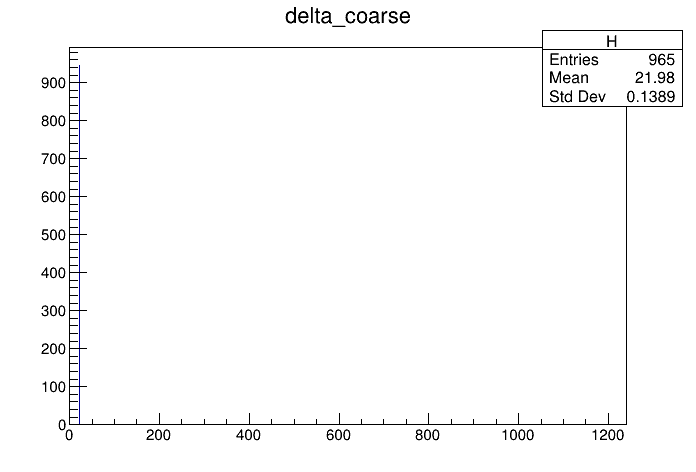

In [9]:
f.tree.Draw("delta_coarse>>H(1240,0,1240)")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAArgAAAHYCAIAAAApvgy/AAAABmJLR0QAAAAAAAD5Q7t/AAAgAElEQVR4nO3dbXKjSLgmUJi4+wI203cZwDKmN0OyMubHO86gQamyXcgCfE50dEgIEAiX8lF+US/LUgEAPPJ/3n0AAMB5CQoAQJGgAAAUCQoAQJGgAAAUCQoAQJGgAAAUCQoAQJGgABeTUnr3IQC/iKAAV5JS6rpuGIZ3HwjwWwgKAECRoACXkVKKuoT8IBuGoW3btm0fVjY8fzWl1K5smjaGYYglsZP9Pveb7N9Ucwlc2AJcRN/3+3+80zQ9+Xf98NVpmp6v0Pd9XqGqqqZpmqZZ7zk/zZqmWR/q8zcFLkRQgCuJcn1TkK+TQYSJvMKm4M+xoLT5fsm+pI+drJPBw00261d+lsA1aXqAC4umhHWtQCwZx7H6GB/RNE1ucWjbNpJEXtI0zaaiYl9bUFXVsiy53SG3RORXp2nKO4lX+77P6+c31QABVyQowIVF0bvuOlB9/HCvHpXo+WkuszfdHVJK8zw/f9N4u/Xgi3Xvh4eHFK8arAFXJCjAhf2xUP/MhtHrsK7ruq67rtuvvKljyDUE4zjGVpuoUVVV13X1f33vOIG3ExTgV6vrOtop+r6PXgUPmx42hmFYlmWaplg5EsO6ZSH2tqFGAa5IUIALe1iob8YxPtkwSu6+76MB4o9bbcTAyOWjB2XsLXbS7lS79gjgEgQFuLAoeje/1MdxjJaFWL5pTVgX5+udZJ/po7BpSlgfwMNDGoah6zqdGeGS3jbeAvi60tDEGACZ2wLy0MR42jRNVP7nsQkP97YePbHe/2aOhLyTeJfnb7pe/+DPAvgR/unCxeSyPBfMm/S/nmVhedTn4Mmrfd9vcsA+KDzc55feFLiQenk0hxpwZvvRhimlPBPzw02erLB/KZb8se/h37wpcBWCAgBQpDMjAFAkKAAARYICAFAkKAAARYICAFD0P+8+AADuxm3ALuGTwx4FBQCOZ+z9yX0+zGl6AACKBAUAbi7udPruo7gqQQGAm5vnuRQUhmH442zlv5w+CgD8Xmoa/khQAOBXSB+GYYgblaWU5nmu/luvEOtUVbW5U1osidXipf2a69Xijmh3qK54780rAbifsxUuVVXFrc/zDdDjxuj5pur5Xup5tXiQ75+eN9w8yE/jtux5h+uX3nHGf/b5A9NHAYD7m+d5WZaU0rIsTdPET/9hGCIT5Kd5tZRS3/fjOK53Mk1T7GGzw+q/TRgRO1JK0zRV/70j/BUJCgDcX/59X1VV27bR4rAxjuN6tSjg18V8bonIVQ4P5dDQtm3TNJu0cTmCAgD3l8v45+Z5rlfWLz1JBn//vmemMyMA/H9N02xaCm5Q0v+l99co5A6opVac6Du62eQmXUkBOI2oM2hX8riGL1lvcoPhl28OCsMwdF0Xn+M4jvupp1NK4ziuP+jYJF6q6/oG1wCAM4jOjOseBuM4fqNGIQqpvMP1UIgrenNQGMex7/uIbNFxdFNPkD/u9SbR7zSltK8jAoDPi46N8TO1bdu+77uuiw4K8zzHsIWvapom9hC9I69eTtXLW2/wVdf1NE05r60nrKhWLUO5oWEYhnEc8zGnlLque+8pALBR128uXL4kz5L0ZMkn5ULq23v4MZ+/Rm/uzLg5ynUVTR7P+uSDzsHizBcDgDPblyB/X6bcqVQ6y6iHqBuoVk0P0cSwX+35AJXP32AbAPijUwSFaCLKc2NVVVXXdd/330tkF6rvArilX/ub7U4VCdn7m5Hi72ndUyFqF3LNQcyfFTHij30UrtUwBnBLvzYoXMs1+ijUdb2uSAjR7zQ/jcqGiBExWCW/ZGwkwDn5zXZynw9z7/z9HfUB+yaG/dP19ErRKhFP9zlDjQLA2/kqPr9rjHrI8yytKwn2FQwb0zR1XZc3UakAAK9z1dBXGqIqxgK8na/i8/v8NbrbtfTXCfB2pa/ih7dO+MbEhcMwXH26w5daf8ilgRifLy7ff1Oow9UF7z4ugN8uRq6llefrPyzkvnejpst5WGzFfaoerpyTU/T/y/4+UZ1iHoVjqVEAOK3cG/0zYnj8RqmwvI2IU/uFKaXSB7J+GjMTHvgR3bBGAYBriWly2raNCuB1L7R4GuGgrut4sJ53J1cb56JxGIZYct3pj/Y3nIwBgPs1Iz2s5yw+/rYGy73c74wALqf0Vdw0TdM0/co0TcuyRLm4fpz3EwujIIzHMbv/ZoW8Vbyat2qa5mVn+VoPP8N8apvV4lPNS7Inp//54vKGTQ8AnNa+8nxzA+FNxXt+dT/pzjAMeTq+3PthvcK9WyiqjzswbxbGZ5JnG/r7lhpBAYCfU+qj8PyGfw9Frfum01/M7Rt3GfxSf4jLWfderD76eG5iQcw89JdvpI8CAFeV69tDrl1YlmWapujB8O5jfK0Y2jDP8zzPER0Or0cRFAA4ryfF3rqRImeC6MlYVdV67v9bijwUoo9CfFZd1637dX6jqmbjhk0Ppfy4GDYJ8G6bafurP305d123b4YPbds2TZO/86M/Y6SHzcJfZdPc8Pdl393mMTQzI8DbHfhV/JnBfvt1StP8/x5//ARM4fx+df1vPFiWf957JAA/7DxfxZT86imcAYCjCAoAQJGgAAAUCQoAQJGgAAAUmUcBACi6YVAQCADOKe4lvb+3U7W6c8HJbWaK/MupGtZ7+/aujr+v9H/dbajreQbvmkcB+LVKX8VR47t56eHC01pXWjdNs59hum3buEPm+tW8sFqd6Xph9a1PIKWUJ2GcpmkTF+JpaQ7sK82jkFKKjLmPk6XlkZ6uEj8BWFsXXdf6Jo8jz3dY2JfBwzDM8xyv5rs0rRf2fZ+jxjzP0zTlvX3jeLqui9ti7e8SGW/6jX0+sLxVzMLdNE2+a0V+KZ7m5fnT3Gyy/pRjqx88/Geq6v/Gf+8+EICfVvoqrqqq7/umaTZL8vrr2zrkr/f1wny7yKZp1stfdir/MU3T+uD34uZMeeU4sPXCZfXhlA47F3ybe2PuD2ZTaG4+sSgoS5t//kN7c7G6+SDy0/iY8vL10/Vnsf8UBAWAt3sSFB4Wb/tv+HV6yEXDZs39Cq+2ucXU5pfq8qi0Xh4FhVhnvat1AIpyLTZfv8Umpmw+yfW7xIabTLY/1E+e9fubHtZtKrlFZ57n9fXI60Q1zvrpYVUrALxe3PIxvuo3N0GOp/ENH49jtWmaNl/+IRcT+Q7LPyAXvU3TbGr7N9ZF1TiOKaV1r8N8alHkxwpVVc3znO/n1Pf9k6aZlNLDW0jHhgd2b3zzqIdNpMr5YLO89BeQe2r85luEAVxLdDJLKY3juG4+SCnN87zuLZi/3qPf36Zc/Plv/nWxnVKq6/pJAbTuyZizzjAMXdfFJrmkW4enatdfMr9vfD7rQSL7n8p5ncgl1RFF5FmGR+aum/v0FH8f8cdUClBrpXkUnli+1YsEgG8YhiGK2Kqq2rZdF6jV7pdhlA65S/83vuEP9L17Xlf/Pc0/+mSR1LbtOI756TzP+X3XVR1d1/1tGffJJoqXirJ/35SSq5Wed0rY9Bp95ZF+gT4KwK9V+irOy9df+7mt/WH3hX1Xx/Wr8fh5Y/yB1mXQ+mAeHknuNLA+hbyH9cLlvx0X1kXeunPDvitltWq82H/mR/VReH+xuokCWfwZbfqnbD7Z/UcjKAC83R+DQnyZ7wu5de+0dde8ajXYLQq/twSF5b8/zfMBVP/tjbj/Kf7w9/l6zc1YiYc/5vdBIY9u2BeXy3FB4c3TE9V1/XDCiuj6sT+2qIPKy/ermXAJ4O3+8qt4X3u/6Qb43n5pudHkSyuUtnp4On98iz/u4Y8+f43eWaxGqb/vnNm2bQSITX+F3ECVO4Luc4agAPB25/kqpuQaQSHqAzYLo+B/2F0lDnU9Y2W16/Rxnr9OQQH4tc7zVUzJNYLC3yhVy5znr1NQAH6t83wVU/L5a3SW4ZFfZeIEAPgBVw0KT5RG2Yq3APBVNwwKAgEAHOX993oAAE5LUAAAim7Y9ADAaaUPcWuoz6y/n7loPX3OZ3ZyEm+fKup71CgA8EPi3onVx02S1n3PH5agKaV9DljftTl2cpKs8OSGVXEfrK7r9uvk+2N9Q+w2PDyeQz4ZQQGAHxL3lR6GIe6D3DRNzgf7OyY/0fd9DgrTNEVueMUBf1IU2KVX44ba+f4O+ZSfb/UZ8XnGbR02uzqw6kJQAOA9coVBFHK5qIuJ/D/5U7tt2/WU//lHdi4p17d4fl3l//p2VhvDMORXN3Uk+62ijuQzpz8MQ44dm5qDY6tYbhgU6oJ3HxfAb9c0Tdd1694JUc7lG0hWH3Ehbo24n+b/ofX9ovKP7M3yePCiRoqoIym9Os9znHL+/5Ot4hZIcfrr+xXs13/Ye6P6+BAOrGK5YVB4cktNAN4oWgrath3Hcf2jeVOi54VPfqZvRMvFMAyx/9hJXpgDxzzPb+nQEEV+HMnz207m2pFNTcmX3mtzr+q/ZNQDAD+nbdv4YR2V8F3XHfJDrmmaqqrmed78Cq8+Ukj+hf2WcQf5psf7eoK1CDf7Pp6xbZxCPC4FiGiPqFbn+/etLTesUQDghPbDHI76cb/+mR7tDpu65Lgv8bqvwA9bd5h4vmbTNOvjf/IRrfterHceaSniyDiOB3zIpYr6izrPGVXV/43/3n0gAD+t9FVcVVU0wIcotjebrNfZF5zLsjRNk1eYpil+QOcd5vXXO89V8d8/pU/Y7D9HltJR5a3W4Wb96ualvu/Xn9565f1ul92n/fxonzhLsXoUQQHg7Upfxfu28/UmUZqu12ma5mFQWO9hs8L6pU0BvN/VsfYJYJ14Hh7V8igNlE5tHxRi5fhANrtdjgsKd7tl+Hlugl7X/8aDZfnnvUcC8MOefxVvOjCul697NX67Zb20/7f7/El96fS/91l9vrg8S7F6lCfDIH/4TAUF4Nc6z282Sj5/jW446sFfJwAcxagHAKDo/UEhhqw8HCcTy/fTS33+tmMAwN94c1CI2TYiCsREXfmluq5jLq2Y73OzSfUxJPe9NwIB4KHSbPqcxBcu5Xtb9Ou6zvNVrZ/GPJf52Oq6zrNyrh9v5tuqztSDRmdGgFeLb9pl+aeu/z3Jl+15iqGjvL/pYV1bEJNnVR/zXa+XryetXN9R40t3JgUAvuTNQWFZlnVQiFtsrR+Etm0fBoJ9jQIAcKD31yiEPAf48y6Km5qGh17aVAMAv8opgkLbtl3XxVyVf7+3T85JuZnJEgDYe39QqOt6nudpmj7TgrBpgzjtPJ0AcA9vDgp1XUdFwqawz70aQ25x2KymdwIAvNQ7p3DO9QH7O2rn+RXi1ahyqD6CQoyfrKpqHMc/dlkAAL7t/UFhHMeYWClEXULbtn3fx8RKVVX1fZ/rEqZp6roub6JSAQBe5+zzQpTunlnqnXCemS5MuATwaiZc+gFnv3tkqaOiDowA8APOHhS+oTQvws0iHgD8gBsGBYEAAI7y/nkUAIDTEhQAgCJBAQAoEhQAgCJBAQAoEhQAgKIbDo80jwIAHOWGQUEgAICjaHoAAIoEBQCgSFAAAIoEBQCgSFAAAIoEBQCg6IbDI82jAABHuWFQEAgA4CiaHgCAorMEhWEYHi5s23b/Ukrp4XIA4FinCAoppXEcU0rrhXVdj+NYVdU4jutuB8MwdF0XW9V1vdkKADjQm4NC1A1Ewb/Wtm1VVcuypJSiz0GuPxjHcZqmlFJKqWka9QoA8Drvr1Fo27bv+/3ypmnWj6PmIGJBxIh4Os/z648RAH6pNweF6GqwrxWIBBDL14/3m1dVpfUBAF7kpMMj27ZtmmYcx+im0Pd9zgTrmoaHSvMoPGFEJQA8dNKgELUI0zS1bZtSik4Mn+yOoNQHgKO8v4/CQ+M45lqE6MQQVQtt2647JUSjQ+6yAAAc66RBoSoU/5uFeicAwEudNCg0TbMeMzmOY3RNiKCwHir5xy4LAMC3nTQoRFVB/SEPj6yqapqmmIIpOi2qVACA1zlLZ8Z9D8SYbSker1sc2rbNL+mdAAAvdZag8NCTHPDkJbeZBoCjnDoofI9AAABHOWkfBQDgDAQFAKBIUAAAigQFAKBIUAAAigQFAKDohsMjzaMAAEe5YVAQCADgKJoeAIAiQQEAKBIUAIAiQQEAKBIUAIAiQQEAKLrh8EjzKADAUW4YFAQCADiKpgcAoOgsQWEYhv3ClFLbtvuXSssBgGOdIiiklMZxTCmtF7Zt23VdVVXjOK67HQzDEMtTSnVdb7YCAA705qAQdQNR8G+Wz/O8LEtKKfoctG0bL43jOE1TSiml1DSNegUAeJ331yi0bdv3/WbhMAxN0+SnkRiqjxaKHBqGYZjn+UcOEwB+ozePemjbNkr9cRzXy+d57vs+qg2qQg+G6iMxRLXES48TAH6n99colIzj2HVddF/IfRGiueH5hvXX/cT5AMAFnXoehTwjQvRj+OQECeZRAICjnLdGYd1xIbcstG277pQQ1QzaHQDgRU4aFErtC5tMYGwkALzUSYPCMAzrmRXGcYzoEEEh923MywGAVzhpUGjbtmmaruuis2HTNDk0TNMU3RujE6JKBQB4nbN0Ztz3QMzDHKr/tji0bZunVdA7AQBe6ixBoaQUBUQEAPgBZw8K31CaF8GwSQD4qhsGBYEAAI5y0s6MAMAZCAoAQJGgAAAUCQoAQJGgAAAUCQoAQNENh0eaRwEAjnLDoCAQAMBRND0AAEWCAgBQJCgAAEWCAgBQJCgAAEWCAgBQdMPhkeZRAICj3DAoCAQAcJSzND0Mw/DkpZTSeklKqW3bJ5sAAIc4RVBIKY3juEkDpZeGYei6Ll6q6/rhVgDAId4cFKJuIAr+h/YvjeM4TVNKKaXUNI16BQB4nffXKLRt2/d96aWmaZqmyUsiFrRtm5/O8/zyQwSA3+rNQSG6GjysFYgQ8LxlIRKD1gcAeJHzjnqIJobNwmhueL5haXjkEwZKAMBDJw0KdV33fZ+bGL5EqQ8AR3l/H4W9aEqIfo5t287zPI5jhIZ4ulnze3kCAPijM9YobLo3zvPcNE0OCuM45pf0TgCAlzpjUKj+O//SenqliAu5/+M4jn/ssgAAfNsZmx6em6ZpHMe6rqPTokoFAHids9QoPOmBuIkCbdsuy6J3AgD8gLMEha8SEQDgB1w1KDzhNtMAcJQbBgWBAACOcr3OjADAjxEUAIAiQQEAKBIUAIAiQQEAKBIUAICiGw6PNI8CABzlhkFBIACAo2h6AACKBAUAoEhQAACKBAUAoEhQAACKBAUAoOiGwyPNowAAR7lhUBAIAOAomh4AgKKzBIVhGB4ubNt2/1JK6eFyAOBYpwgKKaVxHFNK64V1XY/jWFXVOI51XedXh2Houi62Wi8HAA735qAQdQNR8K+1bVtV1bIsKaVlWZqmyeuM4zhNU0oppdQ0jXoFAHid99cotG3b9/1m4TzP64WRG6qPFor103meX3+MAPBLvXnUQ9u2UepHK0O2GblQal+IbaNa4iXHBwC/2wWGR7ZtO8/zNE1VVUVzw/P1S/MoPGFEJQA89P6mhyeGYajrOlLC5+sMlq975UkAwIWdNyi0bTuOY9/3y7LklBC1C3mdaJLQ7gAAL3LSpofopbj/rR/pIT81NhIAXuqkQWEcx6ZpNjkg93wchiGGP8Rqbzg+APgdThoUqqqa53kzv0JUMEzT1HVdrldQqQAAr3OWoLBpZXjSwbBt25iIqdI7AQBe7CxB4atEBAD4AVcNCk+U5lEwDBIAvuqGQUEgAICjnHceBQDg7QQFAKBIUAAAigQFAKBIUAAAigQFAKDohsMjzaMAAEe5YVAQCADgKJoeAIAiQQEAKBIUAIAiQQEAKBIUAICiG456MDwSAI5yw6AgEADAUTQ9AABFZwkKwzA8XNi2bUppszyl1Lbtw00AgAOdIiiklMZx3ASCuq7Hcayqquu6tm3z8mEYuq6Lreq63scIAOAobw4KUTcQBf9a1BYsy5JSWpZlnuccCMZxnKYppZRSappGvQIAvM77axTatu37frMwQkB+mgNB/D9XMAzDMM/zjxwmAPxGbw4K0dVgXyswz/O6uaFt24eBINbR+gAAL3Kx4ZGbmoaHSvMoPGFEJQA8dLGg8BlKfQA4yvv7KHzJpg0iGh3WjRQAwIFOGhSapln3PMgtDptMoHcCALzUSYNCDGeIHJBSmud5Pd4hd34cx/GPXRYAgG87aR+FGDOZ51fo+z7XJUzT1HVdzMVUqVQAgFeqT971L2Zkeri8etQ7oa7PckZ1/W88WJZ/3nskAHcV37TL8k9d/3uSL9vzFENHOWmNQlbqqKgDIwD8gLMHhW8ozaNws4gHAD/ghkFBIACAo5x01AMAcAaCAgBQJCgAAEWCAgBQJCgAAEWCAgBQdMPhkeZRAICj3DAoCAQAcBRNDwBAkaAAABQJCgBAkaAAABQJCgBAkaAAABTdcHikeRQA4Cg3DAoCAQAcRdMDAFB06qCQUhqGoW3blNLmpdJyAOBA5w0KwzB0XRdRoOu6tm3zS3Vdj+O4Xw4AHOu8QWEcx77vU0oppWma5nmO0DAMQ1VVy7KklJZlycsBgMOdNyhUVZVrC9bVBimlpmny06ZpIjoAAIc7b1BomiaaHlJKERTi//M8r3ND27bzPL/nEAHg7s47PDKlVNd113XxdJqmT25YmkfhCSMqAeCh89Yo1HXdNM2yLMuy9H2fOzb+0fJ1Lz4VALiqkwaFyAQ5GUQvBJ0WAeCHnTQo7DVNE0EhPwibvo0AwIFOGhSiu2IezpBSmuc5ng7DkIdErpcDAIc7b2fGaZq6rouJlaqq6vs+j32ILgub5QDA4eqTd+WLmoOHUSAPm1yr67OcUV3/Gw+W5Z/3HgnAXcU37bL8U9f/nuTL9jzF0FHOW6MQntQWqEgAgFc7e1D4htI8CjeLeADwA24YFAQCADjKSUc9AABnICgAAEWCAgBQJCgAAEWCAgBQdMNRD4ZHAsBRbhgUBAIAOIqmBwCgSFAAAIoEBQCgSFAAAIoEBQCgSFAAAIpuODzSPAoAcJQbBgWBAACOoukBACg6e1AYhqFt22EYHi5PKb3hmADg1zh100P0NmiaZhzHlFKOBXl513VN04gLAPAi561RaNu2aZplWVJK0zTN8xyBIGoXYvmyLHk5AHC489YozPM8TVM8bts2d1FMKTVNk1drmmYYBlkBAF7hvEGhqqp174T8YJ7nvu/X64zj+OOHBgC/wkmDQtQQ1HUdlQfzPI/j+Mlxj6V5FJ4wohIAHjpvH4Wqqvq+jz6MUZDvxz48tHzda08DAC7r1EFhnQyMbgCAn3fSoNC2bfXRABHmeY4Hm8Sw6dsIABzopEGh+hjOEI/XAyOHYchDIlNK8zx/skkCAPiqk3ZmrKoqpVTXde6Z2Pd9VDO0bdv3fdd1m+UAwOHqk3fli5qDh1EgpbRfXtdnOaO6/jceLMs/7z0SgLuKb9pl+aeu/z3Jl+15iqGjnLdGITypLVCRAACvdvag8A2leRRuFvEA4AfcMCgIBABwlPOOegAA3k5QAACKBAUAoEhQAACKBAUAoEhQAACKbjg80jwKAHCUGwYFgQAAjqLpAQAoEhQAgCJBAQAoEhQAgCJBAQAoEhQAgKIbDo80jwIAHOWGQUEgAICjXKPpoW3bzZJhGNq2TSm94WgA4Ne4QFBo23ae53UmqOt6HMeqqrqu22cIAOAoZ296SCnN87xeMgxDtWpfqOs6pSQuAMArnL1Goeu6vu/XS1JKTdPkp03TRHQAAA536qDQtm3f95scMM/zuv4gGiZ++MAA4Jc4b9PDMAybrgmfVBoe+YSBEgDw0EmDQkppHMfvld9KfQA4ykmDQjQ3rJsYuq5rmsZ4SAD4SecNCutMMM9z7rS4iQubvo0AwIHqS1TU13U9TVNUMKSUuq6Lp+vHec2TnFFd/xsPluWf9x4JwF3FN+2y/FPX/57ky/Y8xdBRTlqj8EQMhei6Lp72fW8SBQB4kQsHn4fzLJ0nyqlRAHg1NQo/4NTzKDynIgEAXu16TQ9/5DbTAHCUGwYFgQAAjnLhpgcA4NUEBQCgSFAAAIoEBQCgSFAAAIoEBQCg6IbDI82jAABHuWFQEAgA4CiaHgCAIkEBACgSFACAIkEBACgSFACAIkEBACi64fBI8ygAwFFuGBQEAgA4iqYHAKDo1EEhpTQMQ9u2wzBsXorlKaU3HBYA/BrnDQrDMHRdF1FgHMd1z4O6rsdxrKqq67q2bd90gABwf+cNCuM49n2fUkopRbeDqFeI/y/LEsvneVavAAAvct6gUFXVuragaZoIBCmlpmnWy/cNEwDAIc4bFJZlWQeFeZ7jaX4Q2rad5/mnDw4AfofzBoUspRQdFD5Zc1B/3WtPAAAu6+xBoW3bruuapvn87AjL1730FADguk494VL81p+mydAGAHiL8waFuq5zB8a1zcJN30YA4EAnDQoRBfZTKsXkSzG/Qrw6z/M0TW85SAC4vVMHhXEcY2KlEHUJbdv2fd91XSzs+17DBAC8SH3drnwRGjYL6/osZ1TX/8aDZfnnvUcCcFfxTbss/9T1vyf5sj1PMXSUs496eEJFAgC82kmbHv5GaV6Em0U8APgBNwwKAgEAHOXCTQ8AwKsJCgBAkaAAABQJCgBAkaAAABQJCgBA0Q2HR5pHAQCOcsOgIBAAwFE0PQAARYICAFAkKHxWqevDdTmjS7jfSTmj87vfGVU3PamfISgAAEWCAgBQdMNRD4ZHAsBRbhgUBAIAOIqmBwCg6KpBYRiGYRhSSg9f/Xzv1lf0g33FuzujY93vjF50AC7Tse53Ri86gK8c6v9+es3PevtHejbXCwoppbquU0oppa7rhmF49xEBwG1dLygMw9A0TQSFvu/HcXz3EQHAbV0vKMzznGsR4kGpAQIA+EsXCwqRCdq23S8EAA53h+GRm6AQvUvO02morp/1tTnPcVrznGu+/QCsac3TH8D/xvnL5oIAAAYiSURBVNfs8y/bF737b+jPeIegsK5gMIkCABzoYk0PAMBPulhQiMqDTVvDpssCAHCUiwWFqqqapum6Lh7HqAdBAQBe5HpBIaoT6rqu63ocx2mavrr5MAxt2+7HSpSWp5Tatn04s1NpgsjY1c9MBlU6o/a/1q+e/IyyfQS86DVa25zURS9THNva/jCudZmenNFFr9Hzt7viNXr+jpe+TGe3XNM0TdM0fXWrvu+rqmqapmmaeJBfik9jv3yzSX7TCCh5ed/3f9zVK5TOaH14IR/5yc8o2xzek8O4yhktu5O67mVaH17442Fc9Iyue42evN1Fr9GTd7z0ZTq/qwaF79n/lcTj+Et6uNr68frrY/14vfl+V+u/v8OVzmj9+MkmJzyjkCuKNv/a14dxlWuU7U/qupdpEw6y616m0hnd4xrFWcTRXvcaLeWTuu5luoRfFBT2f0n5D2jzHZGfbv5i1nuodj9244+ptKtXeHJGmyPPTn5Gm3cv/QtfrnON1vYndd3LVPr2vO5lKp3Rpa/Rw2rX616j/ZFk171Ml3C9Pgrf1rbt8lGnFE1W1UeD8TzPmybJeZ4f7iG2fThBZPjkrg7x5IzWPTnqui61tJ3tjPJb9H2/OeaLXqP1u+xP6tKXKW7PVtf1uj340pfp4Rld+hpFK3v46mGc84yqwkld+jKd3x0mXPqqfOH/2BEypdQ0zWf22TTNvjvMjymdUd/38ZUXt86KPjsnP6NhGOZ5/vxbn/+Mqj+d1BUvU4i/t2EYuq7LmfWhq5/R5a5RLjjjIOd5Hsfx6tfojyd1uct0Fb+oRiFLKU3T1Pd913VH/WW8N3LuzyiltCxL7rjbNM1Xb7P5ljOKf+HPv86+7V3X6MlJXfQyVVW1LEv6GCYQf3JH9Q8/2xld9xpVVdX3ffx6jj+/q1+j8PCkLn2Zzu83BoXqo/Kq+tMNpTaVTk9qq54s/xnPzyh/QZz8jIaPiTFCVVVd1z0/jJOfUfWVk7rKZdr746+x25zRta7ROhnc5hp95qSudZnO7xcFhWEYSnfv2Py15dqqzd9NXic3dK1fjYWlXb3CkzNqd8OI1wdZWn6GM4rKw1ymNk0T/+Yveo2qpyd10cuUPjrEZLlZ96KX6ckZXfQa7Q8jl5cXvUYPjySf1EUv02X8fP/JN6pWHZv3Q2v2jzebVKsxtfGnE4/XHWuf7Oonz2hzcTdnceYzWlu/13Wv0cbmyC96mdaHtx7Kcd3LVDqj616jdXf9e3zdPTmp616mS/hdQSH+GrL1aKj1S+vlm+6B672tl6//kkq7+uEzWi9fD+85+Rltjuczh3GhM1oeDcq64mXad5v942Fc94wueo02h3GDa7Q/kntcpvP7XUEhTNNUSohPlj986Ru7eoXvHd6Zz+iJW57RRU/KP6Vvb/LN4/u6+12jJ0dy3ct0cvXymh7mAMAN/KLOjADAVwkKAECRoAAAFAkKAECRoAAAFAkKAFxYnvOUFxEUAIAiQQGAq4rbPuV7c8SS+kNeLaWUF66rH9bL67pe3wwi7kWZd7Le7fpmEA/f7mYEBQCuKm7alO/kFLkh5lusqioX3l3XxbzO0zStU0Usj/Wbpum6Lu85blQd+9nsNq9W13Ve3jTNbbPCm2eGBIC/sL5TVLW7k9zy33s+rZfHSw+Xr28Ztfz3blLLx+zO6/X3734n//O2hAIAx8mVCvG0bdtlWardraLzPaajfSF9yDetDutN+r4fx7Gu677vo0kiv13cMn59DPfrWanpAYA7WHcd+KS6rruui9J9czPedXk/DMOyLDkulKJA3/f3SwmVoADAPewL6VgSPQz260ewWJYlpZTrCR7KlQfLRy+HXHMwrDw8hhsQFAC4gxwL8tPIB7lEf7hatmlEWOu6brN+nrwhbzUMQ/R/vB9BAYALi0AQxXb83I/BijEeIVbIrQab5VVVbYZNPhy50Pd93m3XdbmRYpqmvNtxHDeNF7dRR18PALioTTfGzdPSaqVtS80HX9rtnQgKAECRpgcAoEhQAACKBAUAoEhQAACKBAUAoEhQAACKBAUAoEhQAACKBAUAoEhQAACKBAUAoEhQAACKBAUAoOj/Ae7TEBiYpYByAAAAAElFTkSuQmCC
c.Draw()

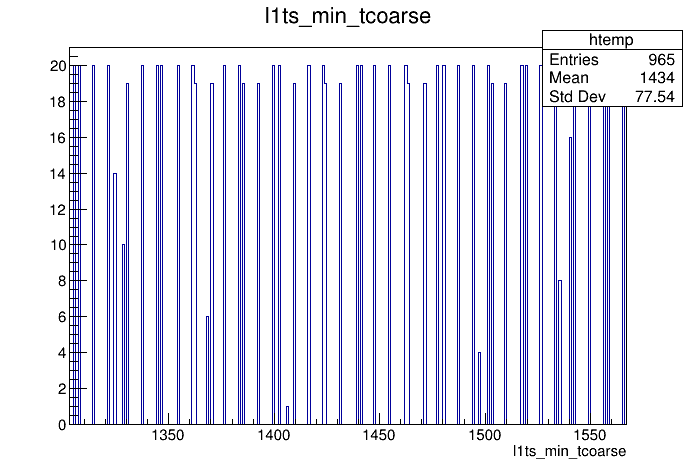

In [10]:
%jsroot off

f.tree.Draw("l1ts_min_tcoarse")
c.Draw()

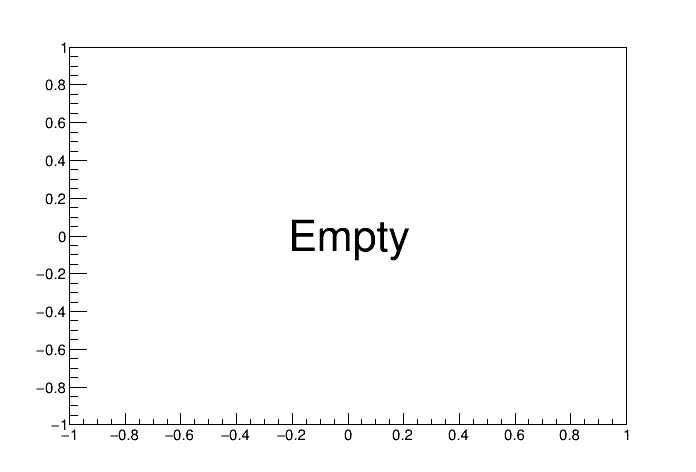

In [11]:
f.tree.Draw("l1ts_min_tcoarse","l1ts_min_tcoarse<1700 && channel==1")
c.Draw()

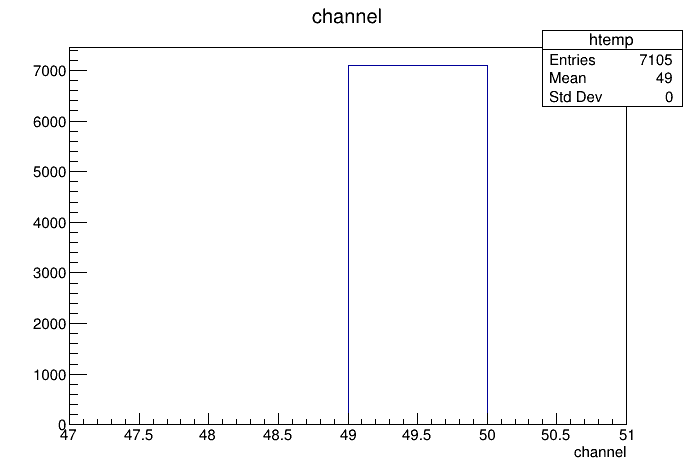

In [72]:
f.tree.Draw("channel","","colz")
c.Draw()

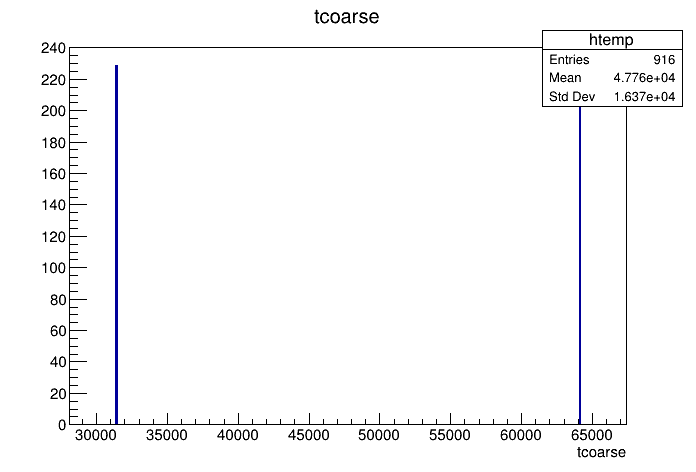

In [65]:
f.tree.Draw("tcoarse")
c.Draw()

In [14]:
R.h2.GetBinCenter(R.h2.FindLastBinAbove(0))-R.h2.GetBinCenter(R.h2.FindFirstBinAbove(0))

AttributeError: h2

In [ ]:
f.tree.Draw("channel")
c.Draw()